In [4]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline  

## Generate meta-training and meta-testing data

In [5]:
from experiments.data_sim import SinusoidDataset

random_state = np.random.RandomState(26)
task_environment = SinusoidDataset(random_state=random_state)

meta_train_data = task_environment.generate_meta_train_data(n_tasks=20, n_samples=5)
meta_test_data = task_environment.generate_meta_test_data(n_tasks=20, n_samples_context=5, n_samples_test=50)

# data for visualization
x_plot = np.linspace(-5, 5, num=150)
x_context, y_context, x_test, y_test = meta_test_data[0]

In [6]:
from meta_learn import SparseGPRegressionMetaLearned

meta_gp_sparse = SparseGPRegressionMetaLearned(meta_train_data, weight_decay=0.2, num_iter_fit=12000, random_seed=5, num_inducing_points=5)
meta_gp_sparse.meta_fit(meta_test_data, log_period=1000)

/opt/homebrew/Caskroom/miniconda/base/lib/python3.11/site-packages/gpytorch/kernels/inducing_point_kernel.py:61: UserWarning: torch.triangular_solve is deprecated in favor of torch.linalg.solve_triangularand will be removed in a future PyTorch release.
torch.linalg.solve_triangular has its arguments reversed and does not return a copy of one of the inputs.
X = torch.triangular_solve(B, A).solution
should be replaced with
X = torch.linalg.solve_triangular(A, B). (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/BatchLinearAlgebra.cpp:2198.)
  inv_root = torch.triangular_solve(eye, chol)[0]
[2023-11-18 15:23:16,566 -INFO]  Iter 1/12000 - Loss: 7.937995 - Time 0.02 sec - Valid-LL: -1.504 - Valid-RMSE: 1.356 - Calib-Err 0.120
[2023-11-18 15:23:24,825 -INFO]  Iter 1000/12000 - Loss: 6.193161 - Time 8.26 sec - Valid-LL: -1.325 - Valid-RMSE: 0.904 - Calib-Err 0.134
[2023-11-18 15:23:33,189 -INFO]  Iter 2000/12000 - Loss: 5.894411 - Time 8.15 sec - Valid-

## Standard GP as a basline

[2023-11-18 15:19:17,366 -INFO]  Iter 1/1000 - Loss: 1.436 - Time 0.001 sec - Valid-LL: -1.315 - Valid-RMSE: 1.402 - Calib-Err 0.290
[2023-11-18 15:19:17,740 -INFO]  Iter 500/1000 - Loss: 1.436 - Time 0.374 sec - Valid-LL: -1.309 - Valid-RMSE: 1.405 - Calib-Err 0.296
[2023-11-18 15:19:18,089 -INFO]  Iter 1000/1000 - Loss: 1.436 - Time 0.349 sec - Valid-LL: -1.309 - Valid-RMSE: 1.405 - Calib-Err 0.296


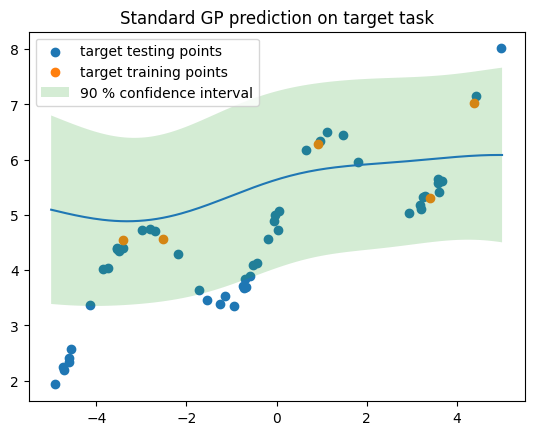

In [ ]:
from meta_learn import GPRegressionLearned

gp = GPRegressionLearned(x_context, y_context, learning_mode='learn_mean', 
                         covar_module='SE', mean_module='constant', random_seed=30)
gp.fit(x_test, y_test)

# plot predictions
pred_mean, pred_std = gp.predict(x_plot)
ucb, lcb = gp.confidence_intervals(x_plot, confidence=0.9)

plt.scatter(x_test, y_test, label='target testing points' )
plt.scatter(x_context, y_context, label='target training points')

plt.plot(x_plot, pred_mean)
plt.fill_between(x_plot, lcb, ucb, alpha=0.2, label='90 % confidence interval')
plt.legend()
plt.title("Standard GP prediction on target task")
plt.show()


[2023-11-18 15:19:18,218 -INFO]  Iter 1/1000 - Loss: 1.469 - Time 0.005 sec - Valid-LL: -1.260 - Valid-RMSE: 1.380 - Calib-Err 0.282
[2023-11-18 15:19:19,023 -INFO]  Iter 500/1000 - Loss: 1.468 - Time 0.810 sec - Valid-LL: -1.245 - Valid-RMSE: 1.386 - Calib-Err 0.291
[2023-11-18 15:19:19,718 -INFO]  Iter 1000/1000 - Loss: 1.468 - Time 0.695 sec - Valid-LL: -1.245 - Valid-RMSE: 1.386 - Calib-Err 0.291


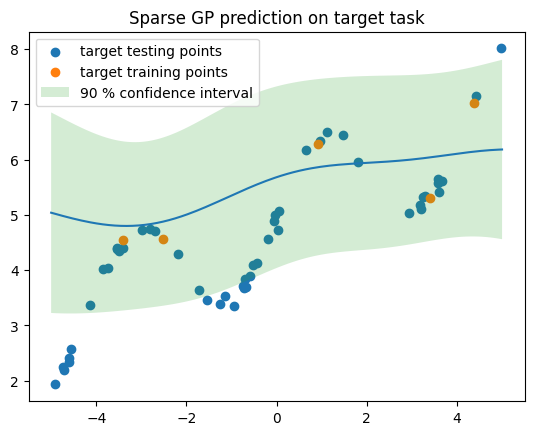

In [ ]:
from meta_learn import SparseGPRegressionLearned

gp = SparseGPRegressionLearned(x_context, y_context, learning_mode='learn_mean', 
                         covar_module='SE', mean_module='constant', random_seed=30)
gp.fit(x_test, y_test)

# plot predictions
pred_mean, pred_std = gp.predict(x_plot)
ucb, lcb = gp.confidence_intervals(x_plot, confidence=0.9)

plt.scatter(x_test, y_test, label='target testing points' )
plt.scatter(x_context, y_context, label='target training points')

plt.plot(x_plot, pred_mean)
plt.fill_between(x_plot, lcb, ucb, alpha=0.2, label='90 % confidence interval')
plt.legend()
plt.title("Sparse GP prediction on target task")
plt.show()

## Meta-Training with PACOH-MAP

In [ ]:
from meta_learn import GPRegressionMetaLearned

meta_gp = GPRegressionMetaLearned(meta_train_data, weight_decay=0.2, num_iter_fit=12000, random_seed=30)
meta_gp.meta_fit(meta_test_data, log_period=1000)

[2023-11-18 15:19:19,839 -INFO]  Iter 1/12000 - Loss: 5.755850 - Time 0.01 sec - Valid-LL: -1.559 - Valid-RMSE: 1.284 - Calib-Err 0.138
[2023-11-18 15:19:24,262 -INFO]  Iter 1000/12000 - Loss: 4.953671 - Time 4.43 sec - Valid-LL: -1.198 - Valid-RMSE: 0.849 - Calib-Err 0.125
[2023-11-18 15:19:28,779 -INFO]  Iter 2000/12000 - Loss: 3.324355 - Time 4.42 sec - Valid-LL: -0.725 - Valid-RMSE: 0.514 - Calib-Err 0.138
[2023-11-18 15:19:33,258 -INFO]  Iter 3000/12000 - Loss: 1.704048 - Time 4.39 sec - Valid-LL: -0.464 - Valid-RMSE: 0.420 - Calib-Err 0.137
[2023-11-18 15:19:37,771 -INFO]  Iter 4000/12000 - Loss: 1.019263 - Time 4.41 sec - Valid-LL: -0.321 - Valid-RMSE: 0.419 - Calib-Err 0.126
[2023-11-18 15:19:42,307 -INFO]  Iter 5000/12000 - Loss: 0.663038 - Time 4.45 sec - Valid-LL: -0.208 - Valid-RMSE: 0.366 - Calib-Err 0.127
[2023-11-18 15:19:47,022 -INFO]  Iter 6000/12000 - Loss: 0.437905 - Time 4.61 sec - Valid-LL: -0.121 - Valid-RMSE: 0.363 - Calib-Err 0.121
[2023-11-18 15:19:51,936 -INFO

0.2642395794391632

# Meta-Training with PACOH-MAP (with inducing points, aka sparse GP)

## Meta-Testing with PACOH-MAP

In [ ]:
ll, rmse, calib_err = meta_gp.eval_datasets(meta_test_data)
print('Test log-likelihood:', ll)
print('Test RMSE:', rmse)
print('Test calibration error:', calib_err)

Test log-likelihood: 0.03292174469679594
Test RMSE: 0.3090186148881912
Test calibration error: 0.13442027885466815


# Meta-Testing with PACOH-MAP Sparse GP

In [ ]:
ll, rmse, calib_err = meta_gp_sparse.eval_datasets(meta_test_data)
print('Test log-likelihood:', ll)
print('Test RMSE:', rmse)
print('Test calibration error:', calib_err)

Test log-likelihood: -1.167404341697693
Test RMSE: 0.6542214423418045
Test calibration error: 0.17043997757136822


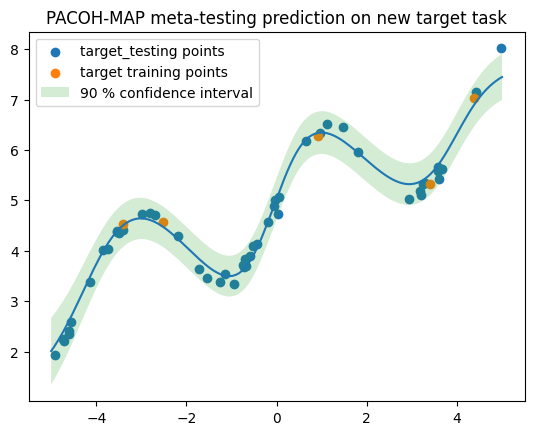

In [ ]:
pred_mean, pred_std = meta_gp.predict(x_context, y_context, x_plot)
ucb, lcb = meta_gp.confidence_intervals(x_context, y_context, x_plot, confidence=0.9)

plt.scatter(x_test, y_test, label='target_testing points' )
plt.scatter(x_context, y_context, label='target training points')

plt.plot(x_plot, pred_mean)
plt.fill_between(x_plot, lcb, ucb, alpha=0.2, label='90 % confidence interval')
plt.legend()
plt.title("PACOH-MAP meta-testing prediction on new target task")
plt.show()

In [ ]:
""" A) generate meta-training and meta-testing data """
from experiments.data_sim import SinusoidDataset
task_environment = SinusoidDataset()
meta_train_data = task_environment.generate_meta_train_data(n_tasks=20, n_samples=5)
meta_test_data = task_environment.generate_meta_test_data(n_tasks=20, n_samples_context=5, n_samples_test=50)


""" B) Meta-Learning with PACOH-MAP """
from meta_learn import GPRegressionMetaLearned
meta_gp = GPRegressionMetaLearned(meta_train_data, weight_decay=0.2)
meta_gp.meta_fit(meta_test_data, log_period=1000)


"""  C) Meta-Testing with PACOH-MAP """
x_context, y_context, x_test, y_test = meta_test_data[0]

# target training in (x_ontext, y_context) & predictions for x_test
pred_mean, pred_std = meta_gp.predict(x_context, y_context, x_test)

# confidence intervals predictions in x_test 
ucb, lcb = meta_gp.confidence_intervals(x_context, y_context, x_test, confidence=0.9)

# compute evaluation metrics on one target task
log_likelihood, rmse, calib_error = meta_gp.eval(x_context, y_context, x_test, y_test)

# compute evaluation metrics for multiple tasks / test datasets
log_likelihood, rmse, calib_error = meta_gp.eval_datasets(meta_test_data)

[2023-11-18 15:20:16,848 -INFO]  Iter 1/10000 - Loss: 5.485433 - Time 0.01 sec - Valid-LL: -1.474 - Valid-RMSE: 1.210 - Calib-Err 0.111
[2023-11-18 15:20:21,936 -INFO]  Iter 1000/10000 - Loss: 4.846932 - Time 5.09 sec - Valid-LL: -1.112 - Valid-RMSE: 0.754 - Calib-Err 0.129
[2023-11-18 15:20:26,856 -INFO]  Iter 2000/10000 - Loss: 3.519575 - Time 4.82 sec - Valid-LL: -0.814 - Valid-RMSE: 0.639 - Calib-Err 0.132
[2023-11-18 15:20:31,688 -INFO]  Iter 3000/10000 - Loss: 2.633233 - Time 4.73 sec - Valid-LL: -0.571 - Valid-RMSE: 0.606 - Calib-Err 0.124
[2023-11-18 15:20:36,535 -INFO]  Iter 4000/10000 - Loss: 2.189989 - Time 4.76 sec - Valid-LL: -0.349 - Valid-RMSE: 0.549 - Calib-Err 0.124
[2023-11-18 15:20:41,511 -INFO]  Iter 5000/10000 - Loss: 1.746224 - Time 4.88 sec - Valid-LL: -0.201 - Valid-RMSE: 0.544 - Calib-Err 0.123
[2023-11-18 15:20:46,298 -INFO]  Iter 6000/10000 - Loss: 1.453197 - Time 4.70 sec - Valid-LL: -0.114 - Valid-RMSE: 0.554 - Calib-Err 0.124
[2023-11-18 15:20:51,116 -INFO